<a href="https://colab.research.google.com/github/karthiklakkur1/Crop-weed-extension/blob/main/pumpkindataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tahmidmir/pumpkin-leaf-diseases-dataset-from-bangladesh")

print("Path to dataset files:", path)

100%|██████████| 270M/270M [00:01<00:00, 148MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tahmidmir/pumpkin-leaf-diseases-dataset-from-bangladesh/versions/1


In [2]:
import shutil

# Adjust destination path in your Drive
dst = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset"

# Copy the dataset folder to Google Drive
shutil.copytree(
    "/root/.cache/kagglehub/datasets/tahmidmir/pumpkin-leaf-diseases-dataset-from-bangladesh/versions/1",
    dst
)

print("Dataset copied to:", dst)


Dataset copied to: /content/drive/MyDrive/Pumpkin_Leaf_Dataset


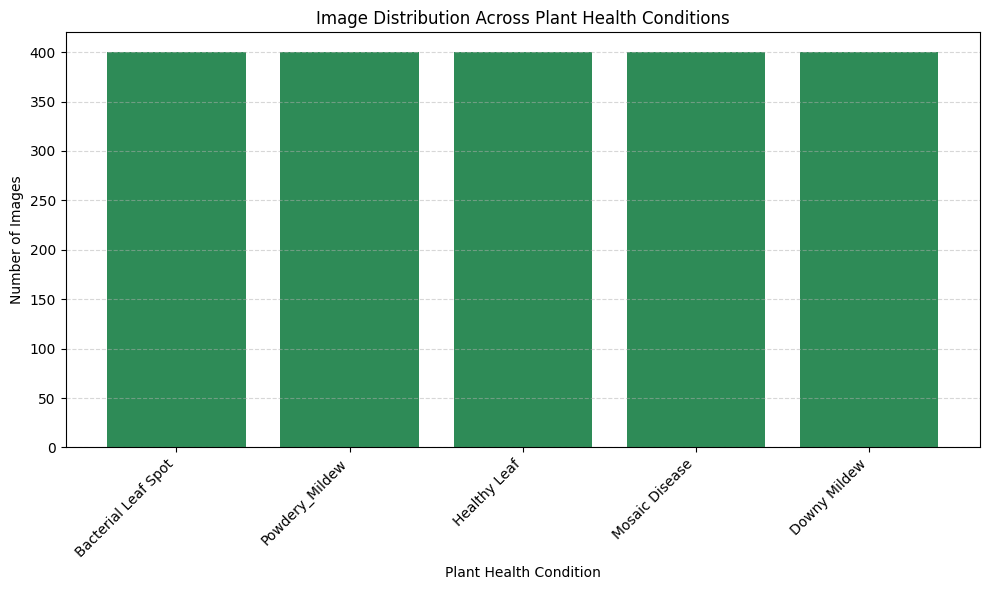

In [4]:
import os
import matplotlib.pyplot as plt

# Path to your dataset in Google Drive
dataset_path = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"

# Get folder names (plant health conditions)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count number of images in each category
image_counts = []
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    num_images = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    image_counts.append(num_images)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, image_counts, color='seagreen')
plt.xlabel("Plant Health Condition")
plt.ylabel("Number of Images")
plt.title("Image Distribution Across Plant Health Conditions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [8]:
import os
import shutil
import random

# Set paths
original_dataset_path = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"
base_output_path = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"
splits = ['train', 'val', 'test']

# Ratios
split_ratio = {
    'train': 0.7,
    'val': 0.15,
    'test': 0.15
}

# Reproducibility
random.seed(42)

# Create output folders
for split in splits:
    os.makedirs(os.path.join(base_output_path, split), exist_ok=True)

# Go through each category and split
for category in os.listdir(original_dataset_path):
    cat_path = os.path.join(original_dataset_path, category)
    if os.path.isdir(cat_path):
        images = [f for f in os.listdir(cat_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        random.shuffle(images)

        total = len(images)
        train_end = int(total * split_ratio['train'])
        val_end = train_end + int(total * split_ratio['val'])

        split_images = {
            'train': images[:train_end],
            'val': images[train_end:val_end],
            'test': images[val_end:]
        }

        for split in splits:
            split_folder = os.path.join(base_output_path, split, category)
            os.makedirs(split_folder, exist_ok=True)
            for img in split_images[split]:
                shutil.copy(os.path.join(cat_path, img), os.path.join(split_folder, img))


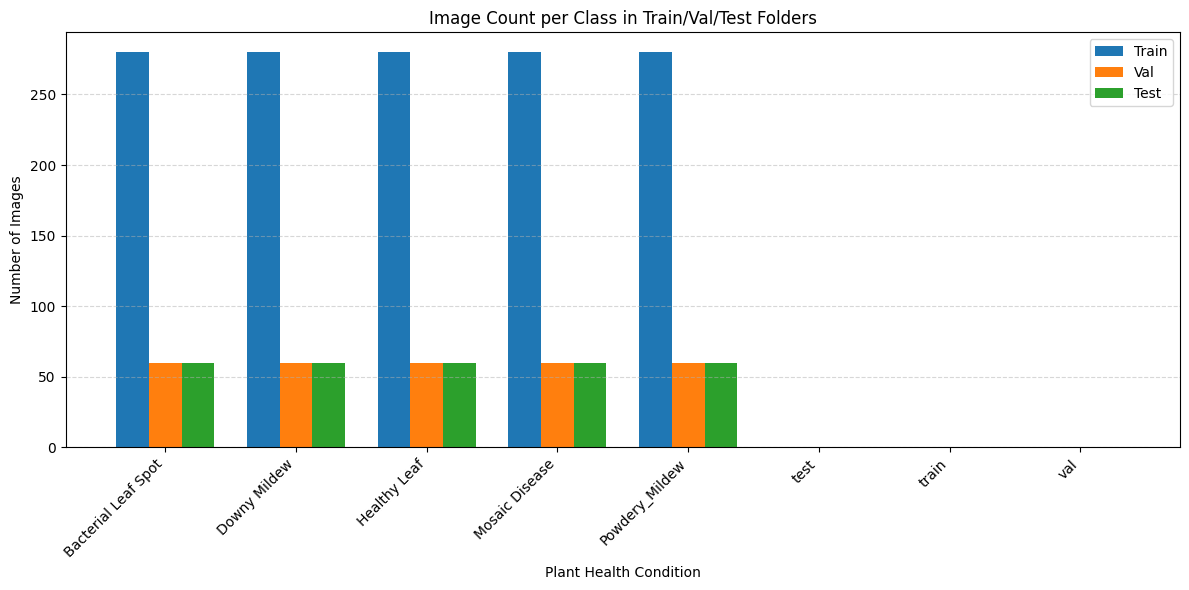

In [9]:
import os
import matplotlib.pyplot as plt

# Base path to split dataset
base_path = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"
splits = ['train', 'val', 'test']

subfolder_counts = {}
all_classes = set()

# Count images in each split/class
for split in splits:
    split_path = os.path.join(base_path, split)
    classes = [d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))]
    all_classes.update(classes)

    for cls in classes:
        folder = os.path.join(split_path, cls)
        count = len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        subfolder_counts.setdefault(cls, {})[split] = count

# Plot grouped bar chart
all_classes = sorted(all_classes)
x = range(len(all_classes))
bar_width = 0.25

plt.figure(figsize=(12,6))
for i, split in enumerate(splits):
    counts = [subfolder_counts[cls].get(split, 0) for cls in all_classes]
    plt.bar([pos + i * bar_width for pos in x], counts, width=bar_width, label=split.capitalize())

plt.xlabel("Plant Health Condition")
plt.ylabel("Number of Images")
plt.title("Image Count per Class in Train/Val/Test Folders")
plt.xticks([pos + bar_width for pos in x], all_classes, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


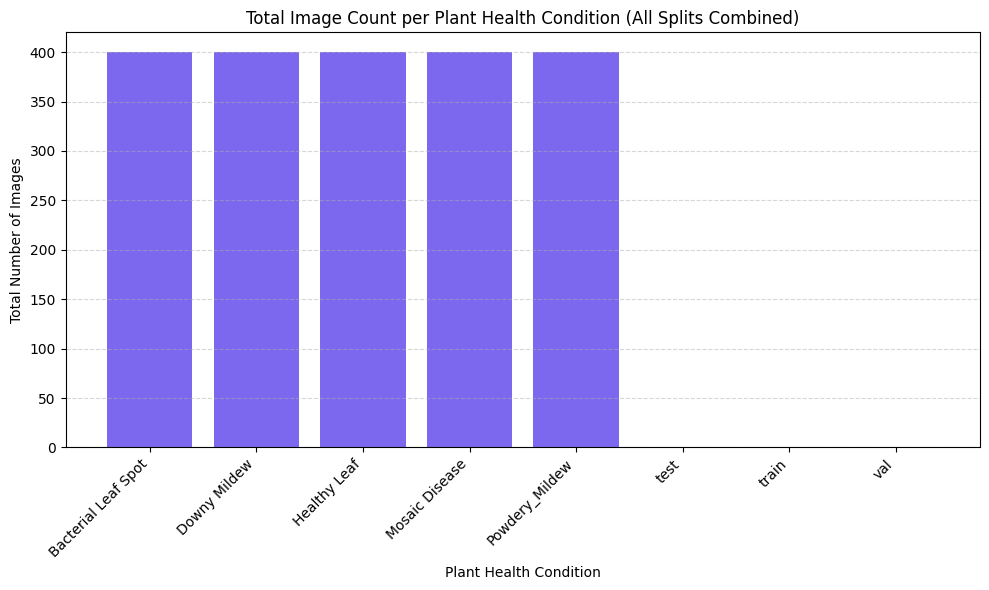

In [13]:
import os
import matplotlib.pyplot as plt

# Root directory where the split folders live
base_path = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"
splits = ['train', 'val', 'test']

# Initialize a dictionary to store total counts per class
class_counts = {}

# Loop through train, val, and test
for split in splits:
    split_path = os.path.join(base_path, split)
    if os.path.exists(split_path):
        for cls in os.listdir(split_path):
            class_path = os.path.join(split_path, cls)
            if os.path.isdir(class_path):
                count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
                class_counts[cls] = class_counts.get(cls, 0) + count

# Plotting
classes = sorted(class_counts.keys())
counts = [class_counts[cls] for cls in classes]

plt.figure(figsize=(10,6))
plt.bar(classes, counts, color='mediumslateblue')
plt.xlabel("Plant Health Condition")
plt.ylabel("Total Number of Images")
plt.title("Total Image Count per Plant Health Condition (All Splits Combined)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [15]:
import os
import shutil

# Your dataset folder
dataset_path = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"

# Specify the path to the nested 'test' folder to be deleted
nested_test_folder_path = os.path.join(dataset_path, 'test', 'test')

# Check if the folder exists and delete it
if os.path.exists(nested_test_folder_path):
    print(f"Deleting nested folder: {nested_test_folder_path}")
    shutil.rmtree(nested_test_folder_path)
else:
    print(f"Nested folder not found: {nested_test_folder_path}")


print("Cleanup complete. ✅")

Deleting folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/Bacterial Leaf Spot
Deleting folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/Powdery_Mildew
Deleting folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/Healthy Leaf
Deleting folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/Mosaic Disease
Deleting folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/Downy Mildew
Cleanup complete. ✅


In [16]:
import os
import shutil

# Base path to your dataset splits
base_path = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"
splits = ['train', 'val', 'test']

# Loop through each split and check if it contains a nested folder of the same name
for split in splits:
    outer_path = os.path.join(base_path, split)
    nested_path = os.path.join(outer_path, split)

    if os.path.exists(nested_path) and os.path.isdir(nested_path):
        print(f"Deleting nested folder: {nested_path}")
        shutil.rmtree(nested_path)

print("Nested folder cleanup complete. ✅")


Deleting nested folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/train/train
Deleting nested folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/val/val
Deleting nested folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/test/test
Nested folder cleanup complete. ✅


In [17]:
import os
import shutil

# Root path of your dataset
base_path = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"

# Structure: each split should NOT contain the others
splits = ['train', 'val', 'test']

for parent in splits:
    parent_path = os.path.join(base_path, parent)
    if os.path.exists(parent_path):
        for nested in splits:
            nested_path = os.path.join(parent_path, nested)
            if nested != parent and os.path.isdir(nested_path):
                print(f"Deleting nested folder: {nested_path}")
                shutil.rmtree(nested_path)

print("Cross-nested folders removed successfully. ✅")


Deleting nested folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/train/val
Deleting nested folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/train/test
Deleting nested folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/val/train
Deleting nested folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/val/test
Deleting nested folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/test/train
Deleting nested folder: /content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset/test/val
Cross-nested folders removed successfully. ✅


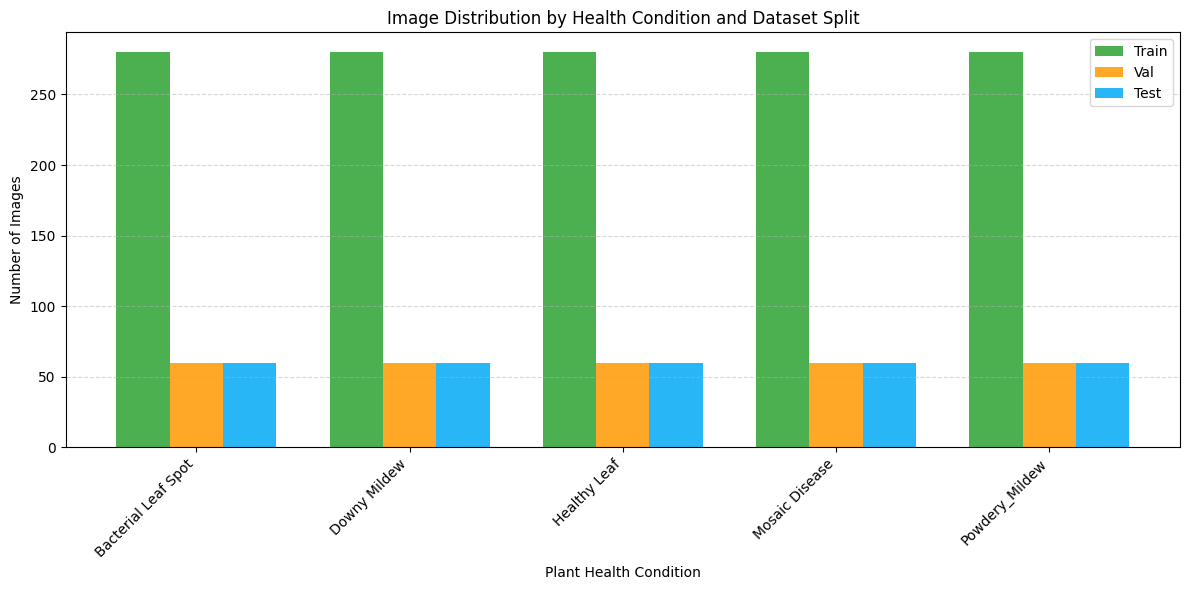

In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Base dataset directory
base_path = "/content/drive/MyDrive/Pumpkin_Leaf_Dataset/Pumpkin Leaf Diseases Dataset From Bangladesh/Original Dataset"
splits = ['train', 'val', 'test']

# Build dictionary with structure: class_name -> {train: count, val: count, test: count}
class_distribution = {}

for split in splits:
    split_path = os.path.join(base_path, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            if cls not in class_distribution:
                class_distribution[cls] = {}
            class_distribution[cls][split] = count

# Sort class names consistently
classes = sorted(class_distribution.keys())

# Prepare data
x = np.arange(len(classes))
bar_width = 0.25
colors = ['#4CAF50', '#FFA726', '#29B6F6']  # train, val, test

# Offsets for grouped bars
offsets = {
    'train': -bar_width,
    'val': 0,
    'test': bar_width
}

# Plot
plt.figure(figsize=(12, 6))
for i, split in enumerate(splits):
    counts = [class_distribution[cls].get(split, 0) for cls in classes]
    plt.bar(x + offsets[split], counts, width=bar_width, label=split.capitalize(), color=colors[i])

plt.xlabel("Plant Health Condition")
plt.ylabel("Number of Images")
plt.title("Image Distribution by Health Condition and Dataset Split")
plt.xticks(x, classes, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
